# 关于针孔成像的仿真

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from proper import *
from matplotlib.colors import ListedColormap

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体或其他支持中文的字体
plt.rcParams['axes.unicode_minus'] = False  # 用于正常显示负号

wavelength = 0.5  # 波长 0.5um
hole_diameter = 10e-6  # 针孔尺寸 10um

(wfo, sampling) = proper.prop_run('pinhole', wavelength, 2048, PASSVALUE={'hole_diameter': hole_diameter})

Lambda = 5.0000E-07   Throughput = 1.00


ImportError: Unable to run pinhole prescription. Stopping.

## 绘图

In [4]:
# 显示光场结果
text = f'Wavelength: {wavelength} um\nHole Diameter: {hole_diameter} m\nPixel Size: {sampling} m/pixel'
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体（可根据需要选择其他字体）
plt.rcParams['axes.unicode_minus'] = False  # 用于处理负号显示的问题

fig = plt.figure(figsize=(30, 10), dpi=100)
plt.subplot(131)
# 创建坐标网格
x = np.linspace(-wfo.shape[1] // 2, wfo.shape[1] // 2, wfo.shape[1]) * sampling
y = np.linspace(-wfo.shape[0] // 2, wfo.shape[0] // 2, wfo.shape[0]) * sampling
# 调整坐标原点，使其位于图像中心
x -= x.mean()
y -= y.mean()
# 绘制图像
plt.imshow(wfo, cmap='gray', extent=[x.min(), x.max(), y.min(), y.max()], origin='lower')
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.title('成像仿真\n' + text)
plt.colorbar()

plt.subplot(132)
plt.imshow(wfo, cmap='gray', extent=[x.min(), x.max(), y.min(), y.max()], origin='lower')
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.title('成像仿真\n' + "红圈直径为30mm")
plt.colorbar()
# 添加一个圆心在图像中心，直径为30mm的圆
circle = plt.Circle((0, 0), 30e-3 / 2, color='red', fill=False)
plt.gca().add_patch(circle)

ax = plt.subplot(133, projection='3d')
from mpl_toolkits.mplot3d import Axes3D

# 创建一个网格
x = np.linspace(-wfo.shape[0] // 2, wfo.shape[0] // 2, wfo.shape[0])
y = np.linspace(-wfo.shape[1] // 2, wfo.shape[1] // 2, wfo.shape[1])
X, Y = np.meshgrid(x, y)
# 绘制3D图
surf = ax.plot_surface(X, Y, wfo, cmap='viridis')
# 添加颜色栏
fig.colorbar(surf)

# 调整子图之间的间距
plt.tight_layout()
# plt.savefig('my_figure.png', dpi=800)  # 保存图像为PNG文件，分辨率为800dpi
plt.show()

NameError: name 'sampling' is not defined

In [5]:
# 指定colorbar的最小值和最大值
vmin = 0.0
vmax = 1.0
fig = plt.figure(figsize=(10, 10), dpi=100)
# 创建坐标网格
x = np.linspace(-wfo.shape[1] // 2, wfo.shape[1] // 2, wfo.shape[1]) * sampling
y = np.linspace(-wfo.shape[0] // 2, wfo.shape[0] // 2, wfo.shape[0]) * sampling
# 调整坐标原点，使其位于图像中心
x -= x.mean()
y -= y.mean()
# 绘制图像
im = plt.imshow(wfo, cmap='gray', extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', vmin=vmin, vmax=vmax)
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.title('成像仿真\n' + text)
# plt.colorbar()
plt.colorbar(im, ticks=[vmin, vmax])

NameError: name 'wfo' is not defined

<Figure size 1000x1000 with 0 Axes>

## 反思与尝试
成像的对比度很低，无法区分光斑和背景。考虑使用伽马变换校正图像；另外，是否可以通过检测第1级衍射来判断成像位置？

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像并以灰度图格式加载
image_cv = cv2.imread('Dataset\FirstImgs\sample1.bmp', cv2.IMREAD_GRAYSCALE)

# 计算原始图像的直方图
hist_original = cv2.calcHist([image_cv], [0], None, [256], [0, 256])

# 伽马变换
gamma = 1.5  # 伽马值，可根据需要调整
gamma_image = np.power(image_cv / 255.0, gamma) * 255.0

# 计算伽马变换后图像的直方图
hist_gamma = cv2.calcHist([gamma_image.astype(np.uint8)], [0], None, [256], [0, 256])

# 进行直方图均衡化
equalized_image = cv2.equalizeHist(image_cv)

# 计算均衡化后图像的直方图
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# 计算伽马变换+均衡化后图像
equalized_gamma_image = cv2.equalizeHist(gamma_image.astype(np.uint8))

# 计算伽马变换+均衡化后图像的直方图
hist_equalized_gamma = cv2.calcHist([equalized_gamma_image], [0], None, [256], [0, 256])

# 显示原始图像及其灰度直方图
plt.figure(figsize=(12, 12))

plt.subplot(4, 4, 1)
plt.imshow(image_cv, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(4, 4, 2)
plt.plot(hist_original)
plt.title('Original Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# 显示伽马变换后的图像及其灰度直方图
plt.subplot(4, 4, 5)
plt.imshow(gamma_image, cmap='gray')
plt.title('Gamma Transformed Image')
plt.axis('off')

plt.subplot(4, 4, 6)
plt.plot(hist_gamma)
plt.title('Gamma Transformed Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# 显示直方图均衡化后的图像及其灰度直方图
plt.subplot(4, 4, 9)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(4, 4, 10)
plt.plot(hist_equalized)
plt.title('Equalized Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# 显示伽马变换+直方图均衡化后的图像及其灰度直方图
plt.subplot(4, 4, 13)
plt.imshow(equalized_gamma_image, cmap='gray')
plt.title('Gamma Equalized Image')
plt.axis('off')

plt.subplot(4, 4, 14)
plt.plot(hist_equalized_gamma)
plt.title('Gamma Equalized Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 读取并可视化三张 BMP 图像
for i in range(1, 4):
    # 生成文件名 sample1.bmp, sample2.bmp, sample3.bmp
    filename = f'sample{i}.bmp'

    # 读取图像
    image = plt.imread(filename)

    # 获取图像的形状
    height, width = image.shape

    # 创建坐标网格
    x = np.arange(0, width)
    y = np.arange(0, height)
    x, y = np.meshgrid(x, y)

    # 创建一个三维图形
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 绘制三维图形
    ax.plot_surface(x, y, image, cmap='viridis')

    # 设置坐标轴标签
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensity')

    # 显示图形
    plt.title(f'3D Visualization of {filename}')
    plt.show()


In [ ]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 定义一个函数，用于读取图像并进行3D可视化
def visualize_images_in_folder(folder_path, folder_name):
    # 获取文件夹中的图像文件
    image_files = [f for f in os.listdir(folder_path) if f.endswith(".bmp")]

    # 创建一个新的3D图形
    fig = plt.figure(figsize=(30, 10))  # 调整figure大小

    # 循环处理文件夹中的每个图像
    for i, image_file in enumerate(image_files):
        # 构建图像文件的完整路径
        image_path = os.path.join(folder_path, image_file)

        # 读入图像
        image = plt.imread(image_path)

        # 获取图像的高度和宽度
        height, width = image.shape

        # 创建网格
        x = np.arange(0, width, 1)
        y = np.arange(0, height, 1)
        X, Y = np.meshgrid(x, y)

        # 创建3D坐标网格
        Z = image

        # 创建3D子图
        ax = fig.add_subplot(1, len(image_files), i+1, projection='3d')

        # 绘制3D表面
        surf = ax.plot_surface(X, Y, Z, cmap='viridis')

        # 设置Z轴刻度范围
        ax.set_zlim(0, 20)

        # 设置图形标题
        ax.set_title(f"{folder_name}/{image_file}")

    # 显示图形
    plt.show()

# 定义文件夹路径
base_folder = r'D:\Projects\Python\SimulationForPinhole\originImgs'
folder_names = ['sample1', 'sample2', 'sample3']

# 遍历每个文件夹并可视化图像
for folder_name in folder_names:
    folder_path = os.path.join(base_folder, folder_name)
    visualize_images_in_folder(folder_path, folder_name)


sample11.bmp中没有灰度值大于阈值的区域！
sample12.bmp中没有灰度值大于阈值的区域！


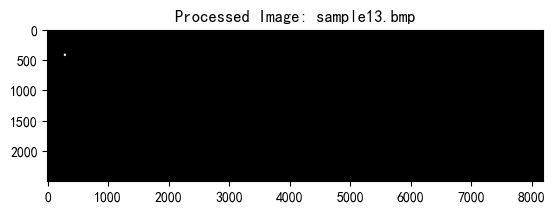

TypeError: '>' not supported between instances of 'NoneType' and 'int'

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 定义一个函数，用于处理图像并显示
def process_and_display_image(image_path):
    # 读入图像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 处理图像：将灰度值大于5的像素设为白色
    red_threshold = 5
    image_red = np.zeros_like(image)
    image_red[image > red_threshold] = 255

    # 寻找红色区域的中心点坐标
    contours, _ = cv2.findContours(image_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        # 获取红色区域的中心坐标
        moments = cv2.moments(contours[0])
        if moments["m00"] != 0:
            center_x = int(moments["m10"] / moments["m00"])
            center_y = int(moments["m01"] / moments["m00"])
            # 在图像上显示中心点坐标
            cv2.circle(image_red, (center_x, center_y), 20, 255, -1)
            # 显示图像
            plt.imshow(image_red, cmap='gray')
            plt.title("Processed Image: "+os.path.basename(image_path))
            plt.show()
        else:
            print(os.path.basename(image_path)+"中没有灰度值大于阈值的区域！")
    else:
        print(os.path.basename(image_path)+"中没有灰度值大于阈值的区域！")

# 定义文件夹路径
base_folder = r'D:\Projects\Python\SimulationForPinhole\originImgs\sample1'  # 更改为您的文件夹路径

# 遍历文件夹中的图像文件并处理显示
for filename in os.listdir(base_folder):
    if filename.endswith(".bmp"):
        image_path = os.path.join(base_folder, filename)
        process_and_display_image(image_path)

process_and_display_image("sample1big.bmp")

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 读入图像
image = cv2.imread("sample1big.bmp", cv2.IMREAD_GRAYSCALE)

# 伽马变换参数
gamma = 1.5  # 可根据需要调整伽马值

# 对图像进行伽马变换
gamma_corrected_image = np.power(image, gamma).astype(np.uint8)

# 显示伽马变换后的图像
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title("原始图像")

plt.subplot(122)
plt.imshow(gamma_corrected_image, cmap='gray')
plt.title("伽马变换后")

# 3D可视化
# 获取图像的高度和宽度
height, width = gamma_corrected_image.shape

# 创建网格
x = np.arange(0, width, 1)
y = np.arange(0, height, 1)
X, Y = np.meshgrid(x, y)

# 创建3D坐标网格
Z = gamma_corrected_image

# 创建3D图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制3D表面
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# 设置Z轴刻度范围
ax.set_zlim(0, 255)

# 设置图形标题
ax.set_title("3D Visualization of Gamma Corrected Image")

# 显示图形
plt.show()

process_and_display_image("sample1big.bmp")

# 结果分析

- 对于针孔样本sample1，在原图上裁切出更大的区域后，即使经过伽马变换，仍然看不到亮度高的区域（主极大），更别提定位次级大，，，在10um的尺度上，衍射现象应该是很明显的，但是衍射图样的光强可能太弱了
- 按照0.067mm的分辨率，次级大直径60mm，应该有1400个像素，但完全观察不到，，，
- 可能现场情况完全不适合使用夫琅和费衍射建模，光源不是平行光，可能小孔成像模型更加合适
- 可是小孔成像成的是什么的像？光源？光源宽度大概有10cm，那么成像的大小应该是50cm甚至更大，但是成像也观察不到这种现象，，但是能观察到孔越小像越大的衍射效应。

# 数据集存在问题

In [ ]:
import cv2

# 读取两张灰度图像
image1 = cv2.imread('originImgs/sample1/sample13.bmp', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('originImgs/sample3/sample33.bmp', cv2.IMREAD_GRAYSCALE)

# 检查图像是否成功加载
if image1 is None or image2 is None:
    print("无法读取图像")
else:
    # 确保两个图像具有相同的尺寸
    if image1.shape == image2.shape:
        # 检查两张图像的像素值是否一致
        if (image1 == image2).all():
            print("两张图像一样")
        else:
            # 计算图像差
            difference = cv2.absdiff(image1, image2)
            
            # 显示原始图像和差异图像
            cv2.imshow('Image 1', image1)
            cv2.imshow('Image 2', image2)
            cv2.imshow('Difference', difference)
            
            cv2.waitKey(0)
            cv2.destroyAllWindows()
    else:
        print("图像尺寸不匹配")

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取两张灰度图像
image1 = cv2.imread('Dataset\FirstImgs\sample1\sample13.bmp', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('Dataset\FirstImgs\sample3\sample33.bmp', cv2.IMREAD_GRAYSCALE)

# 检查图像是否成功加载
if image1 is None or image2 is None:
    print("无法读取图像")
else:
    # 确保两个图像具有相同的尺寸
    if image1.shape == image2.shape:
        # 计算图像差
        difference = cv2.absdiff(image1, image2)
        
        # 显示原始图像和差异图像
        fig = plt.figure()
        
        # 2D差异图
        ax1 = fig.add_subplot(121)
        ax1.set_title('2D Difference')
        ax1.imshow(difference, cmap='gray')
        
        # 3D差异图
        ax2 = fig.add_subplot(122, projection='3d')
        ax2.set_title('3D Difference')
        X, Y = np.meshgrid(range(difference.shape[1]), range(difference.shape[0]))
        ax2.plot_surface(X, Y, difference, cmap='viridis')
        
        plt.show()
    else:
        print("图像尺寸不匹配")